In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

In [111]:
data=pd.read_csv("D:\Beinex\Python\Dataset-Kaggle\\adult.csv")
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [112]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Data cleaning

In [113]:
data.shape

(32561, 15)

In [114]:
data.isna().any().any()

False

*The data doesnot showing NA values. By inspecting the data table, it is found that NA values are represented in "?". 
For better analysis these '?' values are converted to NaN values*

In [115]:
#replace '?' with NaN
data.replace("?",np.nan, inplace=True)
#.replace detects cells where "?" is present and replace it with NaN values
#checking coloumns with na values
data.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

In [116]:
#data copied to another data_1 and data_2
data_1=data
data_2=data

#### Methods of dealing with NA values

##### There are three primary approaches to handling missing data:

- **Eliminate rows or columns with missing data**: If the missing data is not significant or valuable for the analysis, the corresponding rows or columns can be dropped from the dataset. For example, if a particular customer's information is missing or an entire column contains missing values, it can be safely removed from the analysis.

- **Transform missing data into a different format**: When dealing with numerical computations, missing values can cause issues. One approach is to recode the missing data into a different column or variable. For instance, a column representing payment dates with missing values can be transformed into a binary column indicating whether payment has been made yet or not.

- **Fill in missing values using estimation techniques**: Missing data can be filled in with "best guesses" using various methods. For time-series analysis, techniques like moving averages or backfilling can be employed to estimate missing values based on the existing data. These techniques help to maintain the integrity of the data and prevent distortion in the analysis results.

*In summary, the three approaches involve either removing the missing data, transforming it into a different representation, or estimating the missing values using appropriate techniques. The choice of approach depends on the nature of the data and the specific analysis being conducted*.

##### Drop the variables by row or coloumn

In [117]:
#dropping values by row
data_1=data_1.dropna(axis=0)

#checking the shape of df after dropping values
#dropped 2399 shape
data_1.shape


(30162, 15)

In [118]:
#dropping values by column
data_2=data_2.dropna(axis=1)

#checking the shape of df after dropping values
#dropped 3 columns
data_2.shape

(32561, 12)

##### Dropping coloumns by a threshhold missing value percentage 

In [119]:
#evaluating missing values in dataframe 
#column-wise analysis
missing_data=data.isnull().sum()*100/len(data)
print(missing_data)

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64


All missing values are less than 10% of the coloumn variable data given. Rather than dropping these values it is better to fill these coloumns using the best methods available. Howecer to practice removing coloumns with certain percentage of missing data, the code below has been performed

In [120]:
#no columns to drop that exceeds 10% of missing values. Therefore, not dropping any columns
drop_col=missing_data[missing_data>10]
drop_col

Series([], dtype: float64)

##### Replacing missing values using mean, median, mode 
Since our data contains only missing data under categorical variables we are using mode for fill na values

In [121]:
data_3=data

In [122]:
#replace na values with the mode values since all of them are dealing with categorical variable
data_3['workclass'] =data_3['workclass'].fillna(data_3['workclass'].mode()[0])
data_3['occupation'] =data_3['occupation'].fillna(data_3['occupation'].mode()[0])
data_3['native.country'] = data_3['native.country'].fillna(data_3['native.country'].mode()[0])

#checking whether there is any na values in data
data_3.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

##### Replacing values through imputation 

In [123]:
data_4=data

In [124]:
from sklearn.impute import SimpleImputer
#fill the na values under the categorical variable using the most frequent value
data_4['workclass']= SimpleImputer(strategy='most_frequent').fit_transform(data_4[['workclass']])
data_4['occupation']= SimpleImputer(strategy='most_frequent').fit_transform(data_4[['occupation']])
data_4['native.country']= SimpleImputer(strategy='most_frequent').fit_transform(data_4[['native.country']])

#checking whether there is any na values in data
data_4.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

#### Detecting Outliers through multiple ways and dealing with it

Outliers

Outliers in a dataset are data points that significantly deviate from the majority of the other data points. They are typically characterized by having unusually high or low values, which can be considered as extreme observations. Outliers can provide valuable insights into the data, but they can also indicate potential issues in data collection or measurement processes. Therefore, it is important to interpret outliers carefully and consider their significance in the context of the analysis.

Three common approaches to handle outliers:

- **Remove outliers**: In certain cases, outliers can distort statistical analysis by affecting measures like averages or correlations. If the outliers are determined to be irrelevant or anomalous, they can be removed from the dataset. This can be done by excluding data points that fall outside a certain range, such as removing data below the lower X percentile and above the upper X percentile.

- **Segment outliers**: Instead of removing outliers, another approach is to separate them into a distinct group or category. This can be particularly useful when analyzing specific behaviors or patterns associated with outliers. By identifying and analyzing outliers separately, valuable insights can be gained, such as discovering unique customer segments or understanding unusual phenomena.

- **Adjust analysis methods**: Rather than discarding outliers, certain statistical techniques can be employed to mitigate their impact. For instance, weighted means or trimmed means can be used to calculate averages that give less weight to outliers or exclude them entirely. These methods can provide a more robust analysis while still considering the presence of outliers.

It is important to choose the appropriate approach based on the specific context, goals of the analysis, and the nature of the outliers. Understanding the reasons behind the outliers and their potential implications is crucial in making informed decisions regarding outlier handling.

*For better understanding I have implemented all the methods of analysis in a single variabe 'fnlwgt'. This will help to understand how each algorithms are different in detecting the outliers and removing it.*

##### 1.Univariate Outliers

In [155]:
data_clean=data_4
data_4.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


<Axes: >

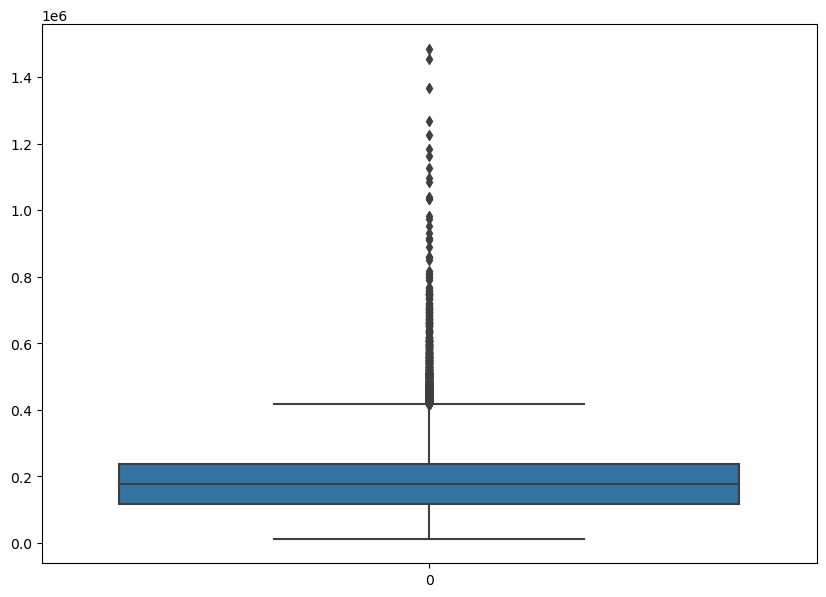

In [127]:
#Outlier detection done through visualizing the varaibale distribution in a boxplot
plt.figure(figsize=(10,7))
sns.boxplot(data_4['fnlwgt'])

##### Removing the outiers using percentile based threshholds

<function matplotlib.pyplot.show(close=None, block=None)>

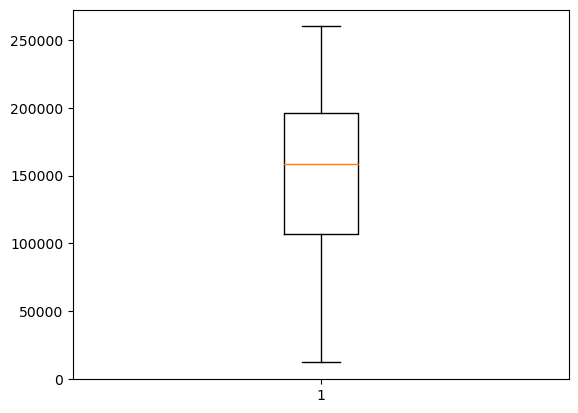

In [128]:
#Calculate the lower and upper thresholds
#lower_threshold = np.percentile(data['fnlwgt'], 5)  # Remove the lowest 5% outliers
outliers=np.percentile(data_4['fnlwgt'],80)  # Remove the highest 20% outliers

# Remove the lowest and highest outliers by filtering the DataFrame
data_4=data_4[data_4['fnlwgt']<outliers]

#plot the boxplot again to find whther it removed outliers
plt.boxplot(data_4['fnlwgt'])
plt.show

##outliers removed successfully 

##### Removing the outiers using Interquartile range IQR

<function matplotlib.pyplot.show(close=None, block=None)>

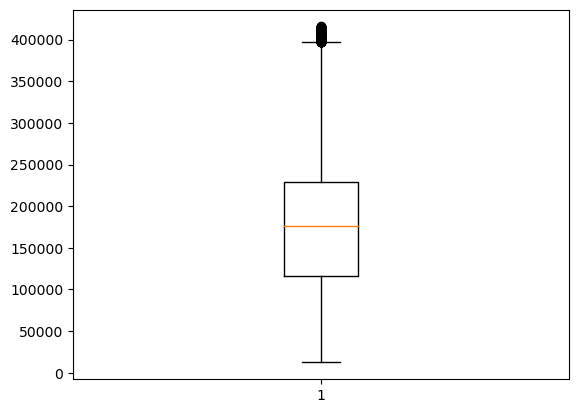

In [129]:
data_5=data_clean

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1=data_5['fnlwgt'].quantile(0.25)
Q3=data_5['fnlwgt'].quantile(0.75)

#Calculate the interquartile range (IQR)
IQR = Q3-Q1

#Define the lower and upper bounds for outliers
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

#Remove data outside the lower and upper bounds
data_5=data[(data['fnlwgt']>=lower_bound)&(data['fnlwgt']<=upper_bound)]

#plot the boxplot again to find whther it removed outliers
plt.boxplot(data_5['fnlwgt'])
plt.show

In [130]:
data_6=data_clean
#Calculate the mean and standard deviation of the column
data_mean,data_std=data_6['fnlwgt'].mean(), data_6['fnlwgt'].std()

#Calculate the cutoff value
cut_off=data_std*3
    
#Calculate the lower and upper bound values
lower_bound,upper_bound= data_mean-cut_off,data_mean+cut_off
    
#Remove outliers based on the bounds
data_fil=data_6[(data_6['fnlwgt']>=lower_bound)&(data_6['fnlwgt']<= upper_bound)]
    
#Calculate and print the total number of outliers
no_outliers=data_6.shape[0]-data_fil.shape[0]
print('Total number of outliers:',no_outliers)


Total number of outliers: 347


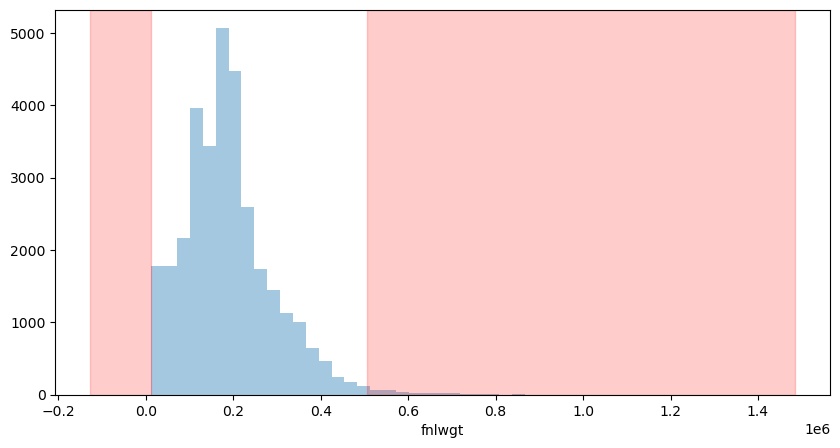

In [131]:
#plot the boxplot again to find whther it removed outliers
plt.figure(figsize=(10,5))
sns.distplot(data_6['fnlwgt'],kde=False)
plt.axvspan(xmin=lower_bound,xmax=data_6['fnlwgt'].min(),alpha=0.2, color='red')
plt.axvspan(xmin=upper_bound,xmax=data_6['fnlwgt'].max(),alpha=0.2, color='red')

##### Removing the outiers using z-score method

In [132]:
data_7=data_clean
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))
out_zscore(data_7['fnlwgt'])

Total number of outliers are 347


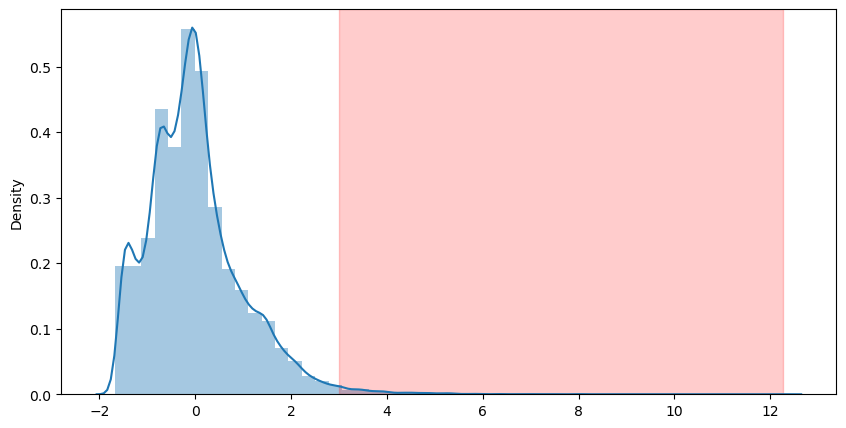

In [133]:
plt.figure(figsize=(10,5))
sns.distplot(zscore)
plt.axvspan(xmin=3 ,xmax=max(zscore),alpha=0.2, color='red')

In [134]:
#Data Frame without outliers
data_7n=data_7[(data_7['fnlwgt']<3)|(data_7['fnlwgt']>-3)]

##### Removing the outliers using Isolation Forest method

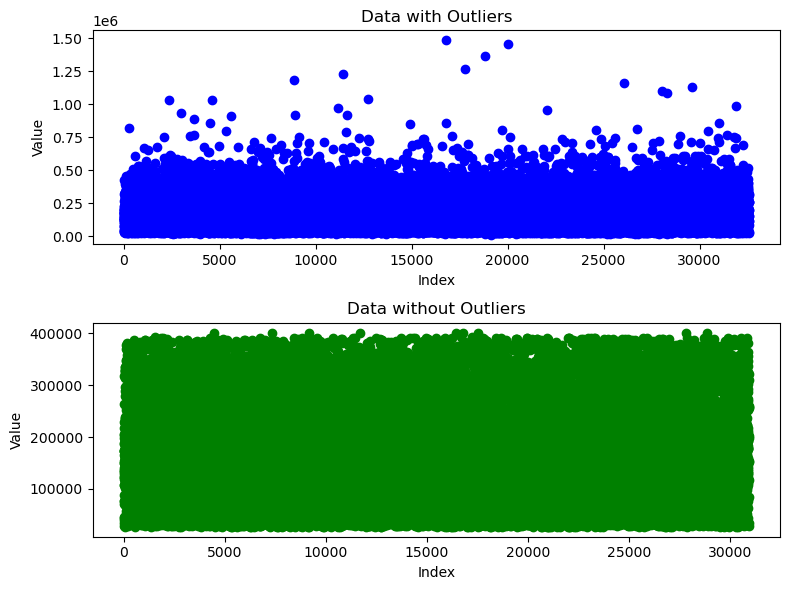

,fnlwgt
0,77053
1,132870
2,186061
3,140359
4,264663
...,...
32556,310152
32557,257302
32558,154374
32559,151910


In [135]:
data_8=data_clean
def remove_outliers_IF(data, contamination=0.05):
    # Create an Isolation Forest model
    model =IsolationForest(contamination=contamination,random_state=111)

    # Fit the model and predict outlier labels
    outlier_labels = model.fit_predict(data)

    # Identify and remove outliers from the data
    data_filtered = data[outlier_labels != -1]
    
    # Plot the data before and after removing outliers
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(data)), data, color='b', label=data_8[['fnlwgt']])
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Data with Outliers')
    
    plt.subplot(2, 1, 2)
    plt.scatter(range(len(data_filtered)), data_filtered, color='green', label='Filtered Data')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Data without Outliers')

    plt.tight_layout()
    plt.show()
    return data_filtered

remove_outliers_IF(data_8[['fnlwgt']])

##### 2.Multivariate Outliers

##### Removing the outliers using DBSCAN method

In [136]:
data_9=data_clean
#assigning varaible for 
X=data_9[['age','fnlwgt']].values

data_db=DBSCAN(eps=3.0,min_samples=10).fit(X)
db_pred=data_db.labels_

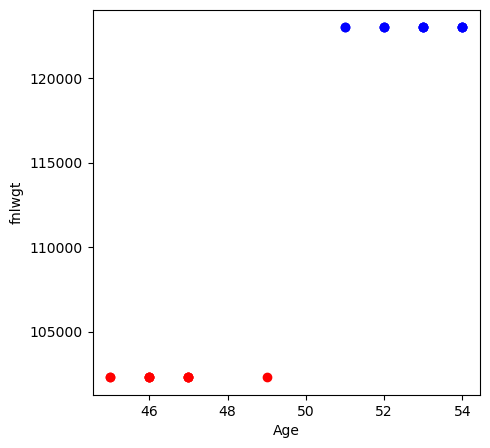

In [137]:
pd.Series(db_pred).value_counts()

plt.figure(figsize=(5,5))

unique_labels=set(db_pred)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in db_pred]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('Age');
plt.ylabel('fnlwgt');

*outliers are found and displayed. Outliers detected from 'Age' variable is shown in red colour and red colour signifies outliers found from varaible 'fnlwgt'*.

*Rather than finding univariate outliers, multivariate outlier analysis will help to find outliers from correlated variables which is more meaningful.*

##### Removing the outliers using Local Outlier Factor Method

In [138]:
from sklearn.neighbors import LocalOutlierFactor
data_lof=LocalOutlierFactor(n_neighbors=50,contamination='auto')
X=data_clean[['age','fnlwgt']].values
y_pred=data_lof.fit_predict(X)

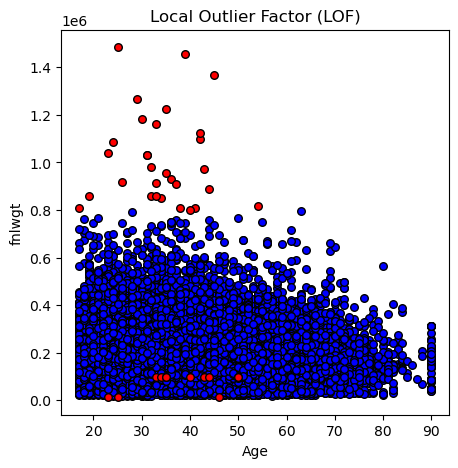

In [139]:
plt.figure(figsize=(5,5))
#plot the level sets of the decision function
in_mask=[True if l == 1 else False for l in y_pred]
out_mask=[True if l == -1 else False for l in y_pred]
plt.title("Local Outlier Factor (LOF)")

#inliers
a=plt.scatter(X[in_mask, 0], X[in_mask, 1], c='blue',edgecolor = 'k', s = 30)
# outliers
b=plt.scatter(X[out_mask, 0], X[out_mask, 1],c='red',edgecolor = 'k', s = 30)

plt.xlabel('Age');
plt.ylabel('fnlwgt');
plt.show()

##### outliers are represented in red colours. As we can see the LOF method considered the 2 variables and identified the outliers

### Data cleaning - Other tasks

(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <BarContainer object of 10 artists>)

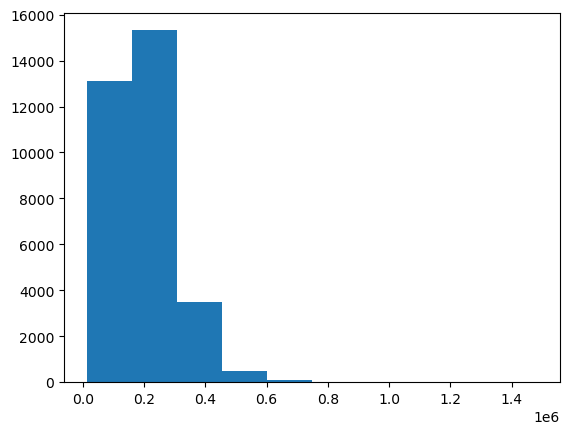

In [140]:
plt.hist(data['fnlwgt'])

In [141]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [142]:
#The categorical variable are change to numercal values using LabelEncoder method
data['income']=LabelEncoder().fit_transform(data['income']) #0 coded as <=50K and >50K as 1
data['sex']=LabelEncoder().fit_transform(data['sex']) #0 coded as female and male as 1
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,0,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,0,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0


In [143]:
#income column was represented in 0 and 1. However by adding 1 to all values under the variable values changes 
data['income']= data['income']+1
#finding the unique values nder teh coloumn to find whether the code is implemented properly
data['income'].unique()

array([1, 2])

In [144]:
data['native.country'].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [145]:
#removing "-" values
#changing from United-States to United States 
data['native.country'] = data['native.country'].str.replace('-',' ')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,0,0,4356,40,United States,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United States,1
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,0,0,4356,40,United States,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United States,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United States,1


In [146]:
data['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [147]:
# Create a new column 'new_labels' using np.where to map labels to 1 or 2
#combining 2 or more labels into 1 label and createing a new coloum 
data['martial_Status'] = np.where(data['marital.status'].isin(['Widowed','Divorced','Separated','Never-married']), 'Single', 'In a relation')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,martial_Status
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,0,0,4356,40,United States,1,Single
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United States,1,Single
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,0,0,4356,40,United States,1,Single
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United States,1,Single
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United States,1,Single


(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

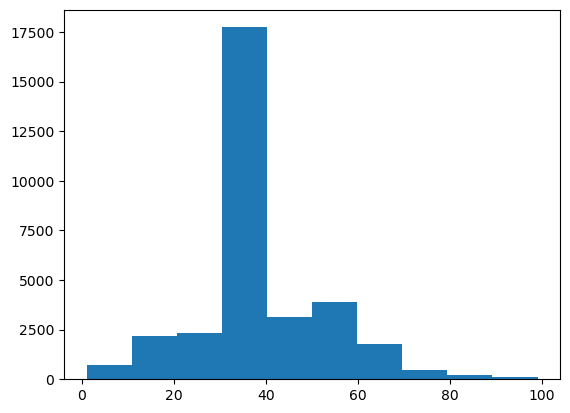

In [148]:
#Hours per week follows normal distribution 
plt.hist(data['hours.per.week'])

<function matplotlib.pyplot.show(close=None, block=None)>

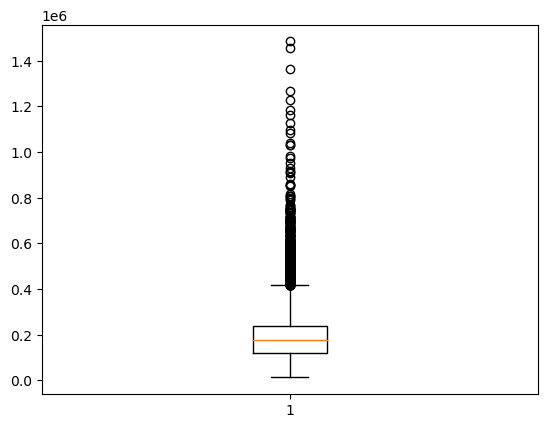

In [149]:
#certain outliers are found in 'fnlwgt' variable.
plt.boxplot(data['fnlwgt'])
plt.show

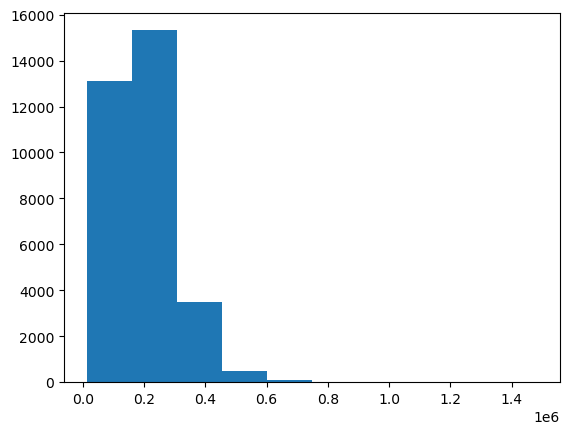

In [150]:
plt.hist(data['fnlwgt'])
#plt.axvline(data['fnlwgt'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.show()

In [151]:
data['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [152]:
#Rename the 'workclass' to 'Employment_status'
data.rename(columns={'workclass':'Employment_status'},inplace=True)
data.head()


,age,Employment_status,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,martial_Status
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,0,0,4356,40,United States,1,Single
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United States,1,Single
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,0,0,4356,40,United States,1,Single
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United States,1,Single
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United States,1,Single


In [153]:
#data['race']=LabelEncoder().fit_transform(data['race']) 
#data.head()

<BarContainer object of 5 artists>

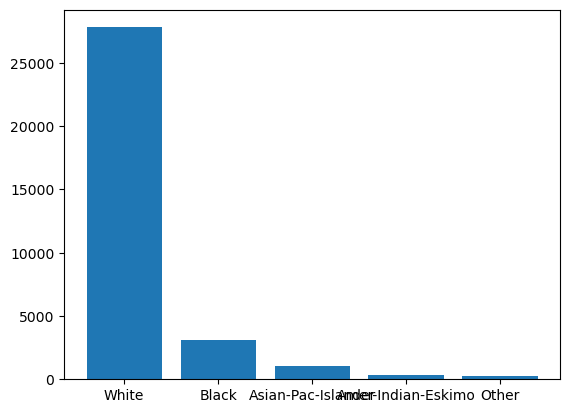

In [154]:
plt.bar(data['race'].value_counts().index,data['race'].value_counts())